In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

data_path = 'simulation_results/clean_data/'

pid_nominal = pd.read_csv(f'{data_path}results_pid_nominal.csv')
pid_with_noise = pd.read_csv(f'{data_path}results_pid_with_noise.csv')
pid_with_disturbances = pd.read_csv(f'{data_path}results_pid_with_disturbances.csv')  
onoff_nominal = pd.read_csv(f'{data_path}results_onoff_nominal.csv')
onoff_with_noise = pd.read_csv(f'{data_path}results_onoff_with_noise.csv')
onoff_with_disturbances = pd.read_csv(f'{data_path}results_onoff_with_disturbances.csv')
fuzzy_nominal = pd.read_csv(f'{data_path}results_fuzzy_nominal.csv')
fuzzy_with_noise = pd.read_csv(f'{data_path}results_fuzzy_with_noise.csv')
fuzzy_with_disturbances = pd.read_csv(f'{data_path}results_fuzzy_with_disturbances.csv')

data = {
    "pid_nominal": pid_nominal,
    "pid_with_noise": pid_with_noise,
    "pid_with_disturbances": pid_with_disturbances,
    "onoff_nominal": onoff_nominal,
    "onoff_with_noise": onoff_with_noise,
    "onoff_with_disturbances": onoff_with_disturbances,
    "fuzzy_nominal": fuzzy_nominal,
    "fuzzy_with_noise": fuzzy_with_noise,
    "fuzzy_with_disturbances": fuzzy_with_disturbances
   }





--- Nominal ---



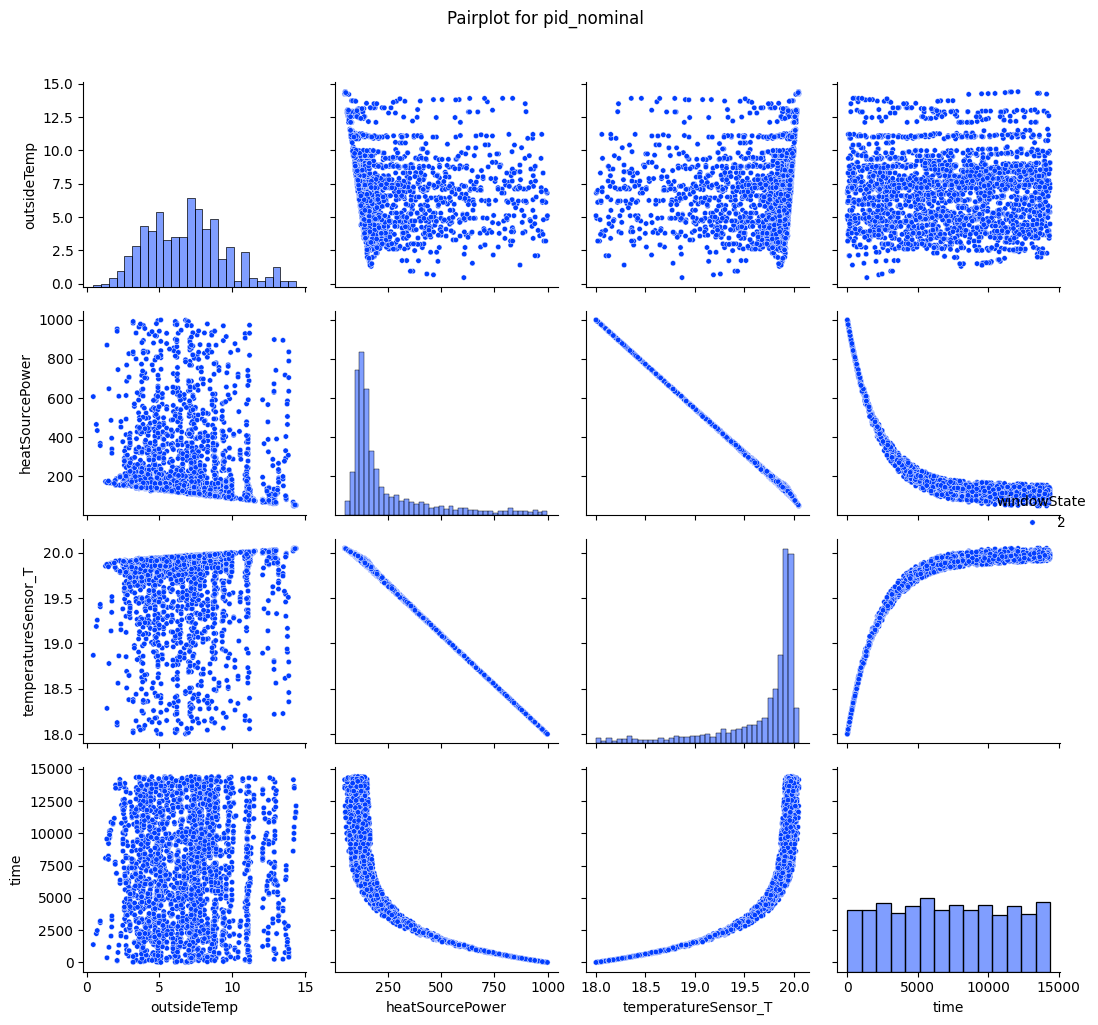

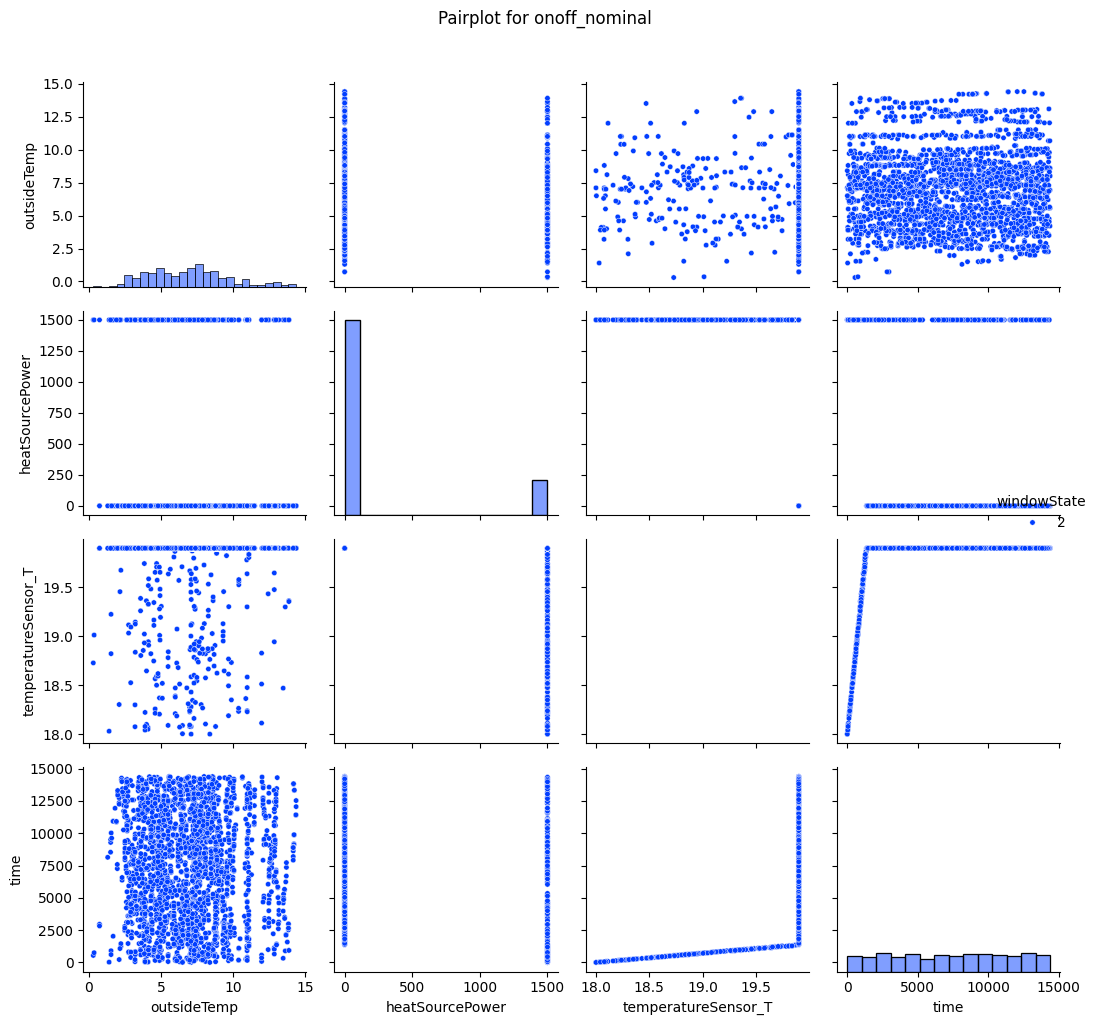

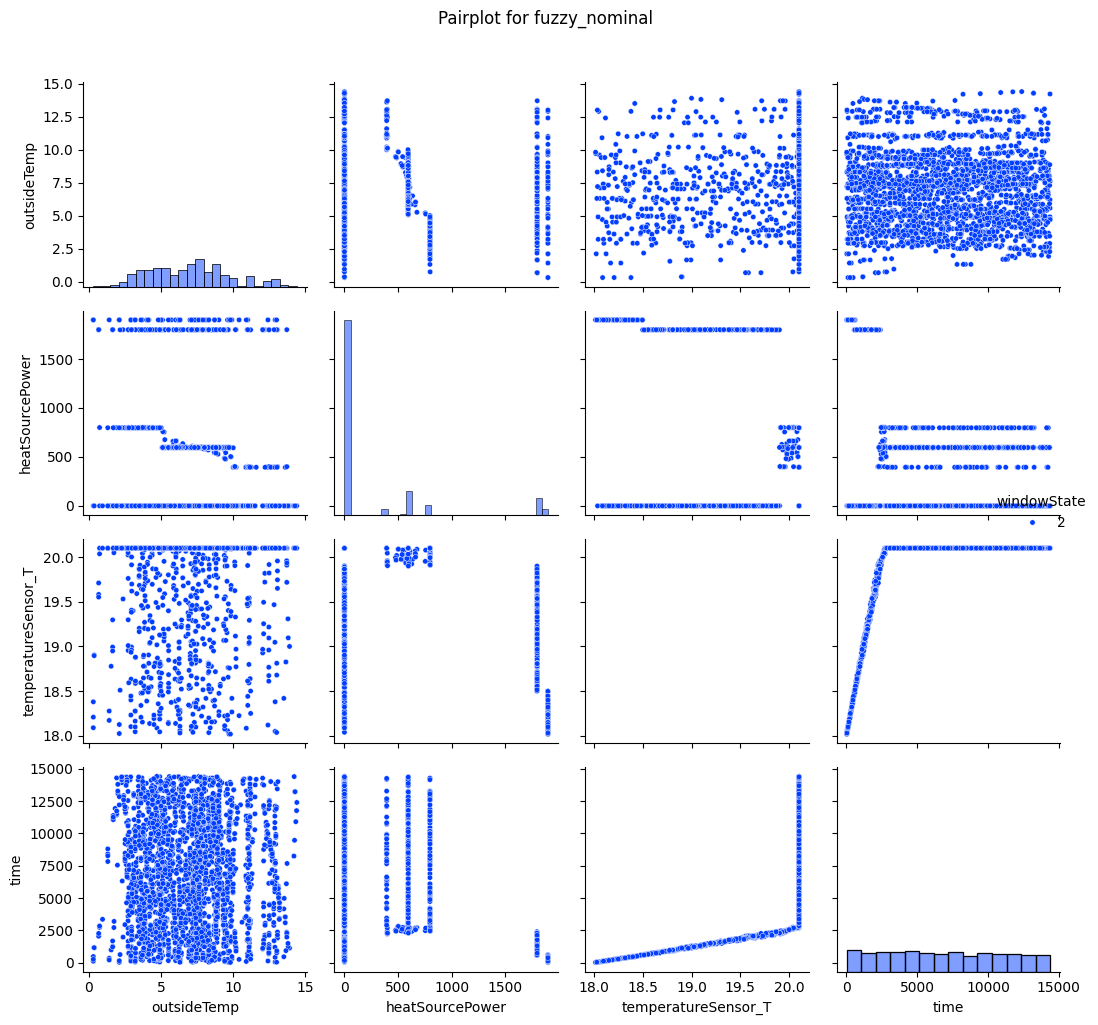


--- With Noise ---



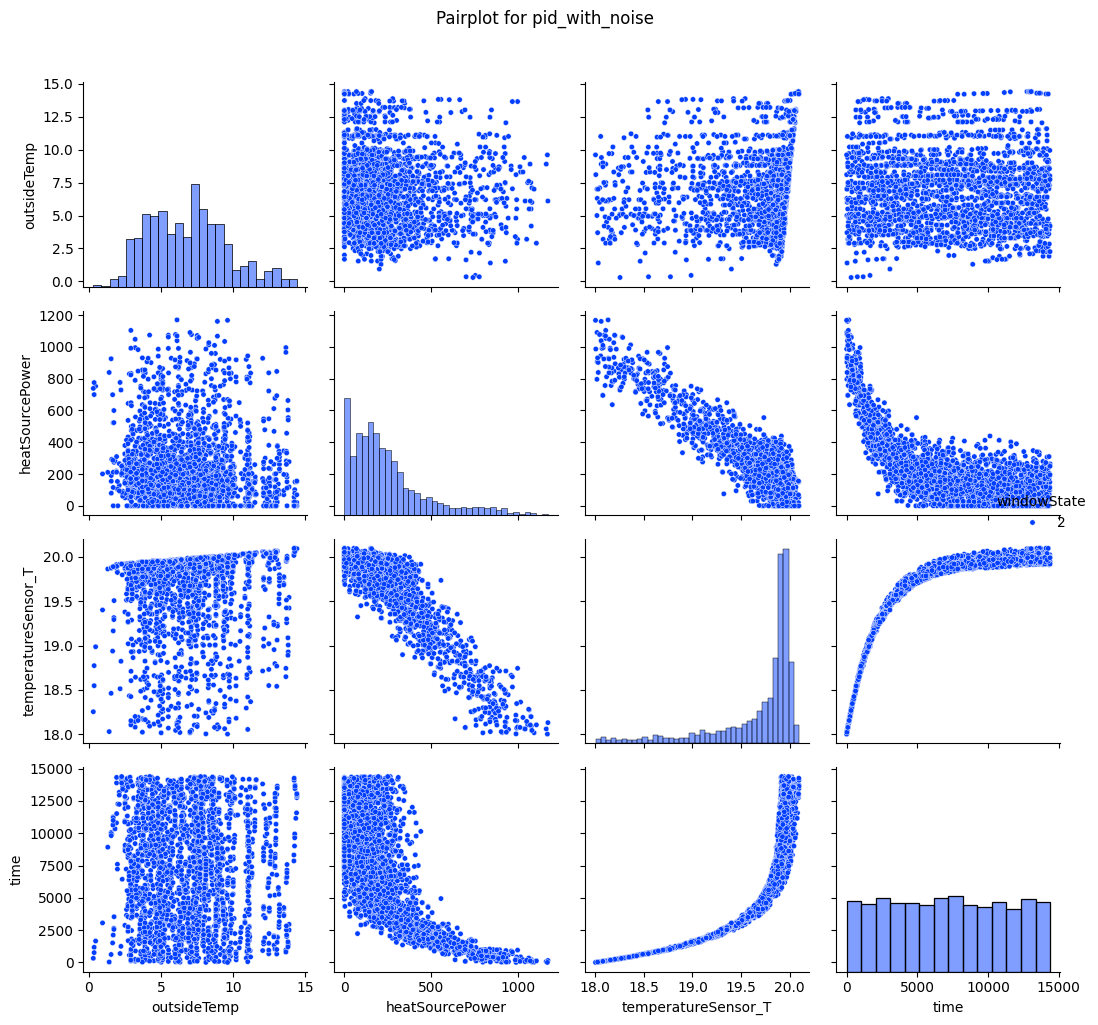

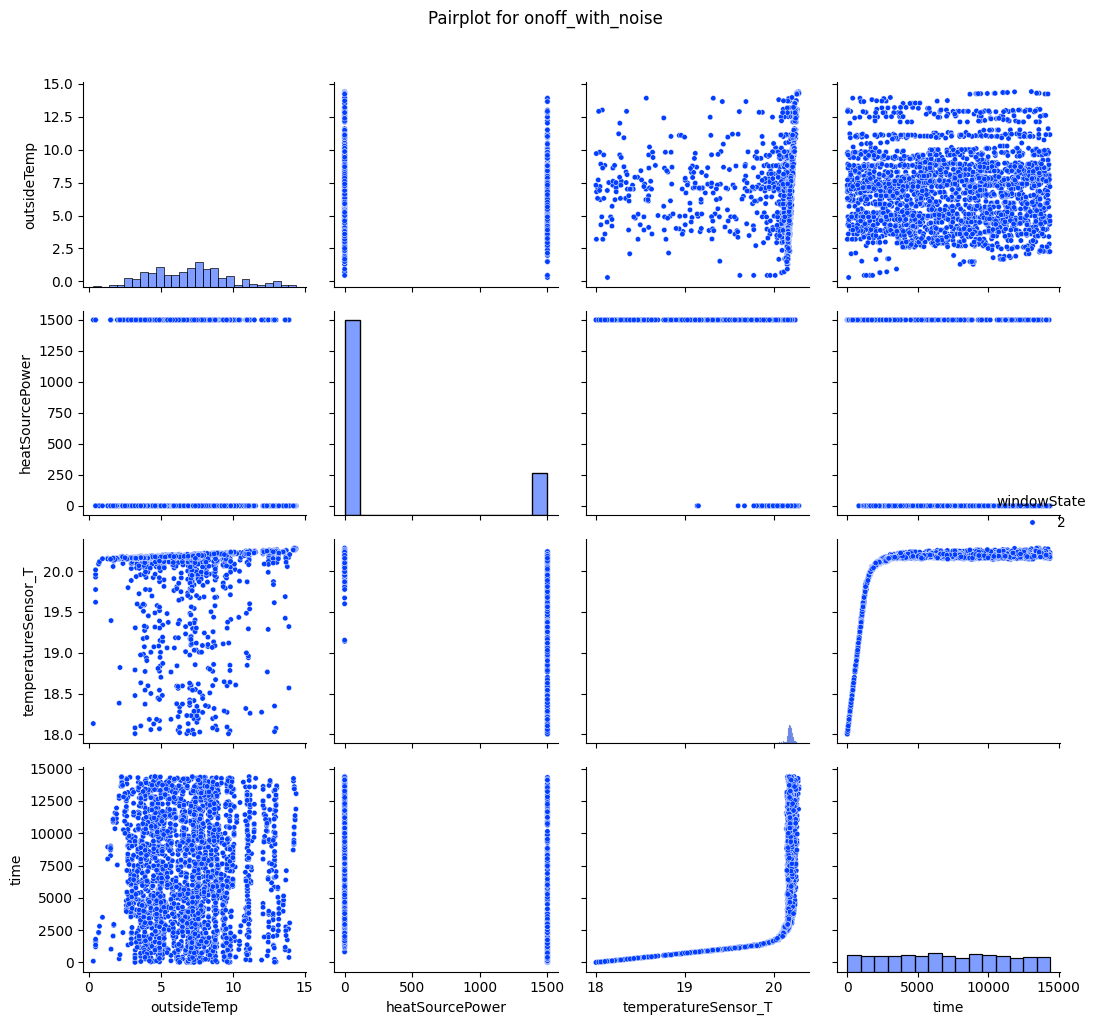

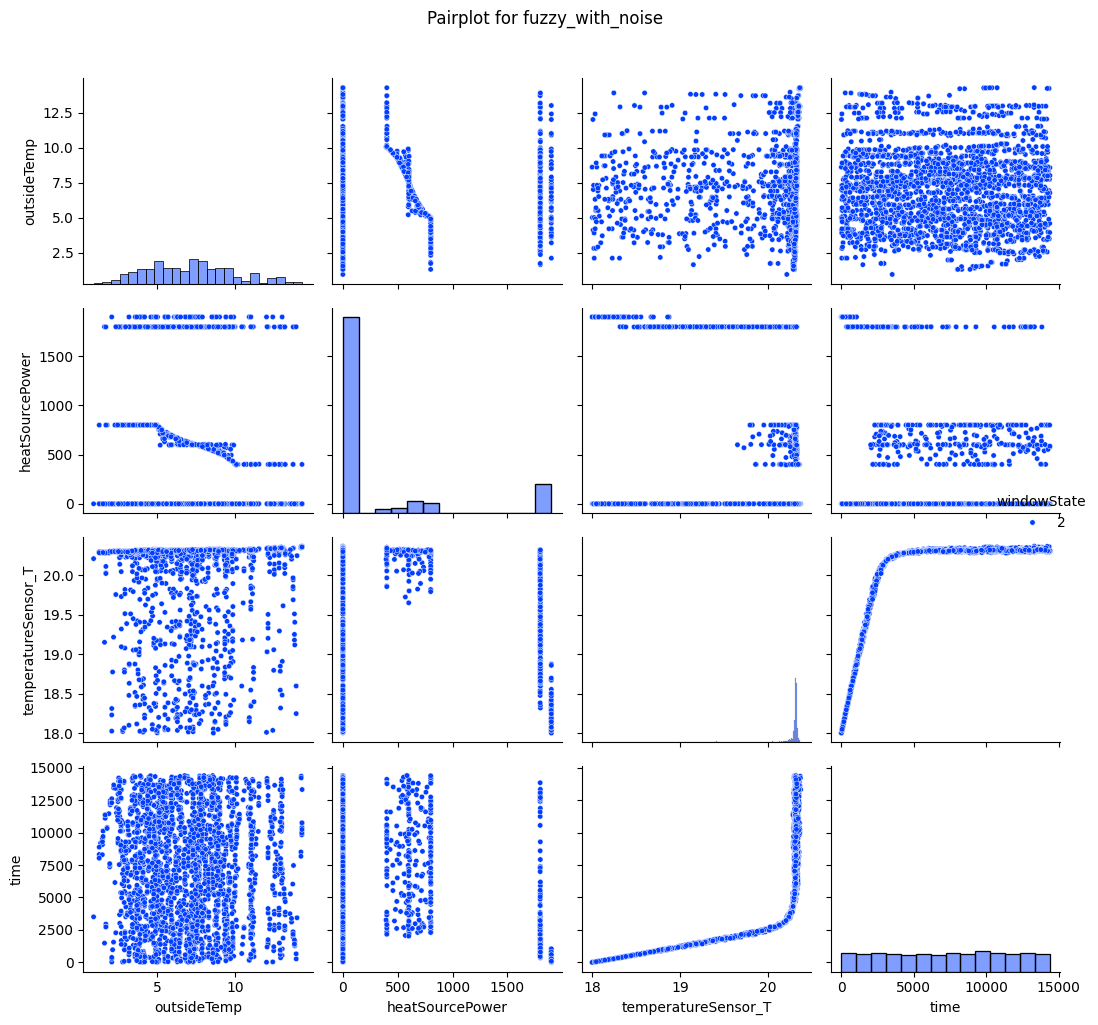


--- With Disturbances ---



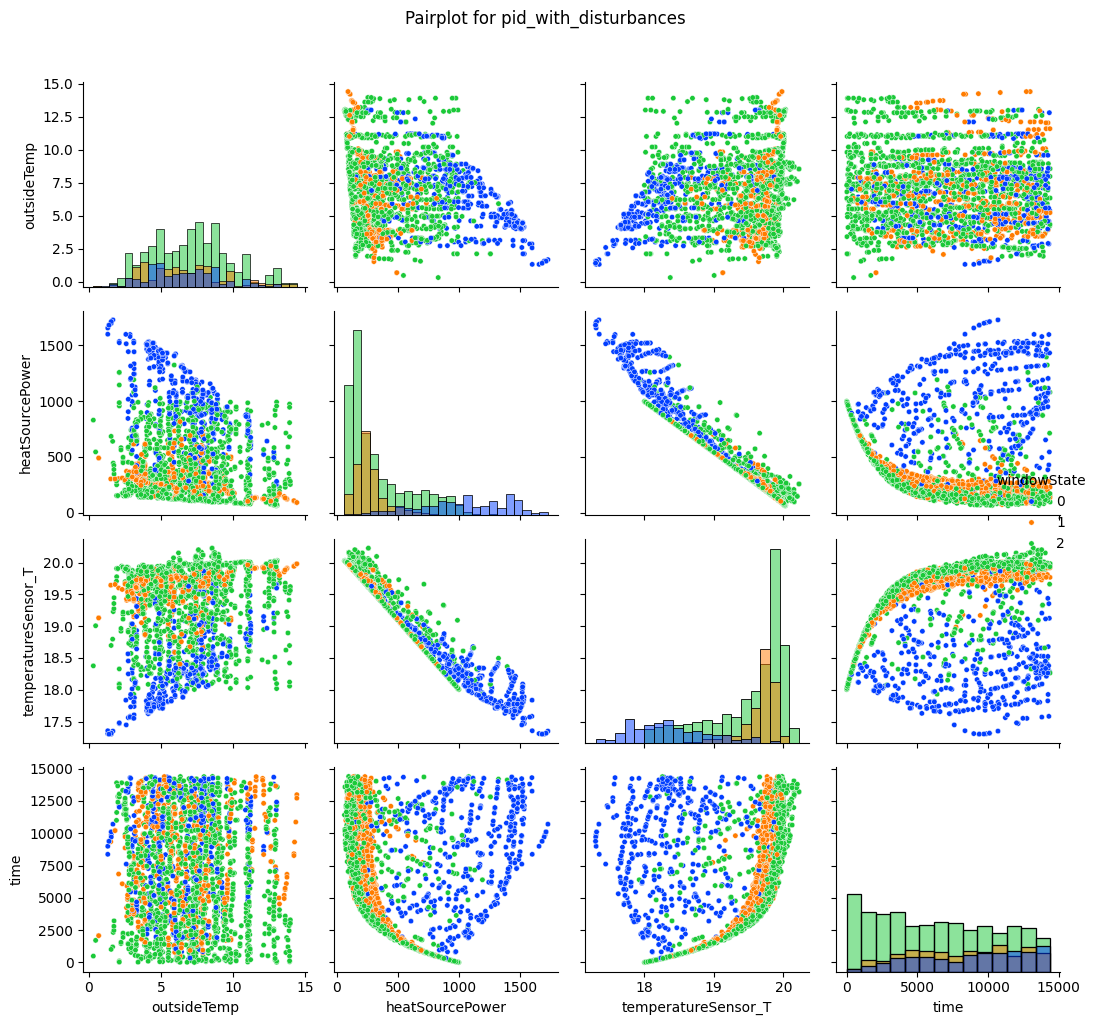

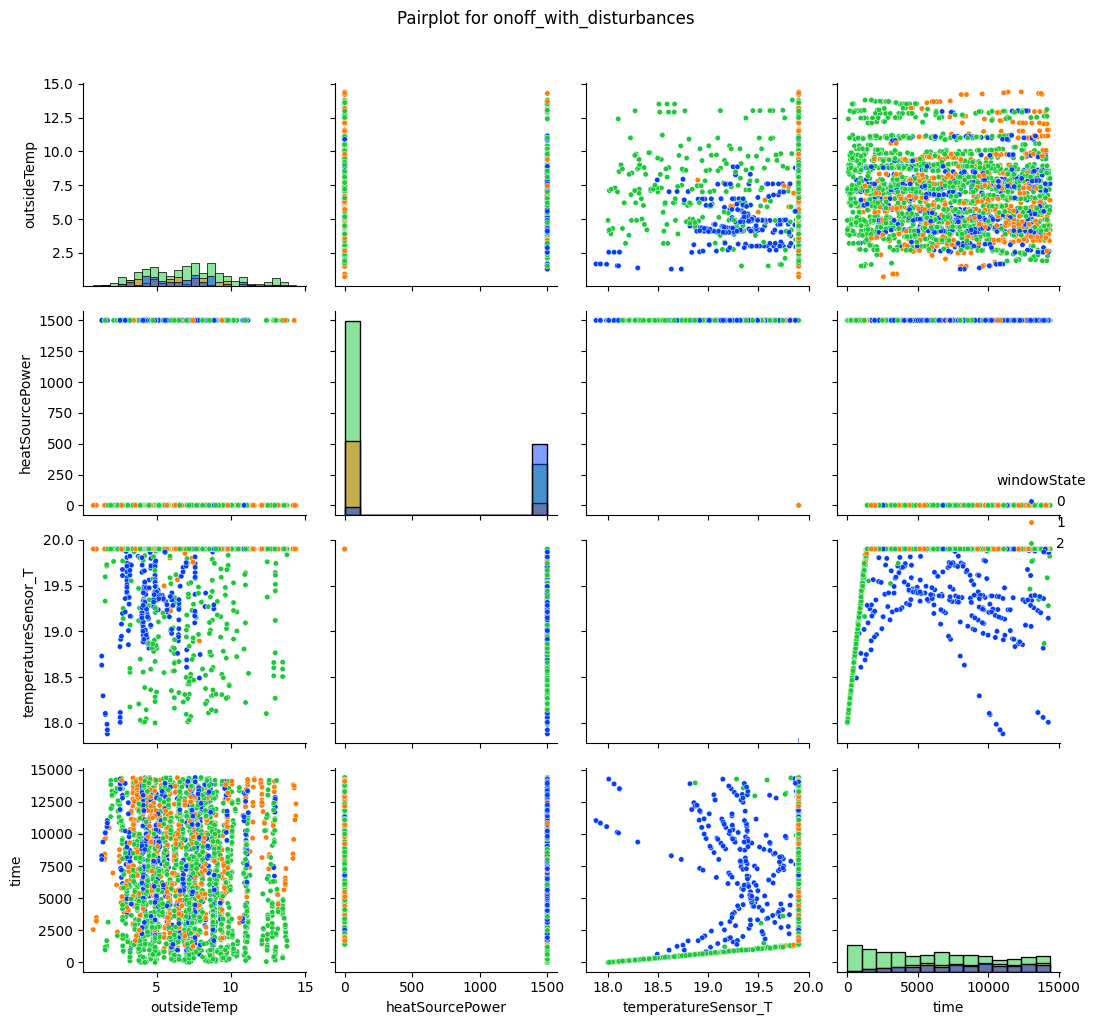

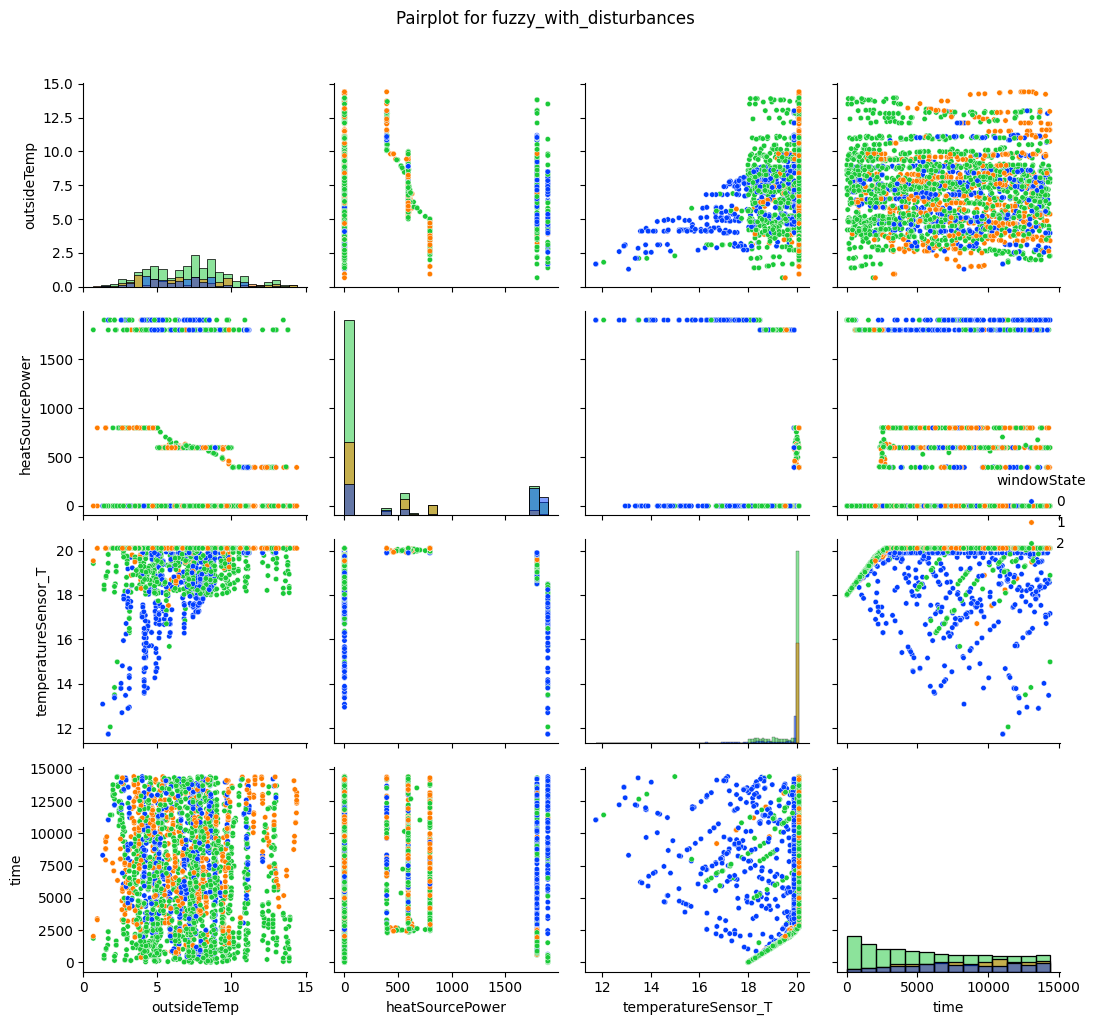

In [15]:
groups = {
    "Nominal": ['pid_nominal', 'onoff_nominal', 'fuzzy_nominal'],
    "With Noise": ['pid_with_noise', 'onoff_with_noise', 'fuzzy_with_noise'],
    "With Disturbances": ['pid_with_disturbances', 'onoff_with_disturbances', 'fuzzy_with_disturbances']
}

for group_name, keys in groups.items():
    print(f"\n--- {group_name} ---\n")  # Just a visual separator in console
    for key in keys:
        df = data[key]
        subset = df #[df['simulation_run'] % 5 == 0]
        
        g = sns.pairplot(
            subset[['outsideTemp', 'heatSourcePower', 'temperatureSensor_T', 'windowState', 'time']].sample(2500),
            kind='scatter',
            hue='windowState',
            palette='bright',
            diag_kind='hist',
            plot_kws={'s': 15}
        )
        g.fig.suptitle(f"Pairplot for {key}", y=1.02)
        g.fig.tight_layout()
        plt.savefig(f"plots/correlations/pairplot_{key}.png")  # Saves each figure
        plt.show()  # Shows each figure immediately
       


NaNs: 0
Infs: 0


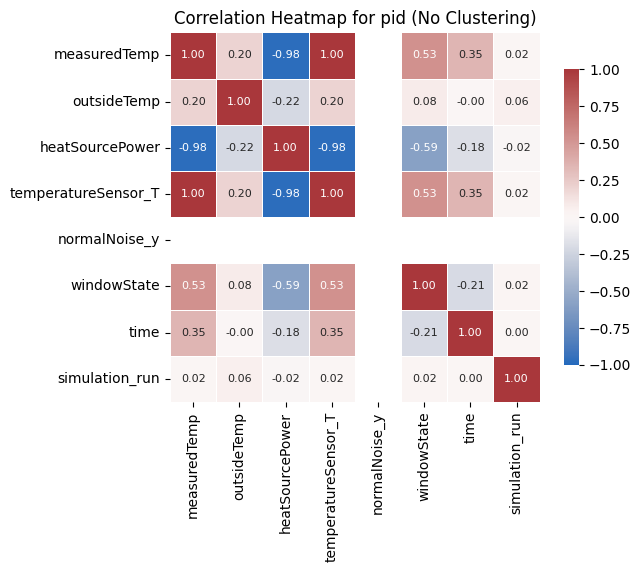

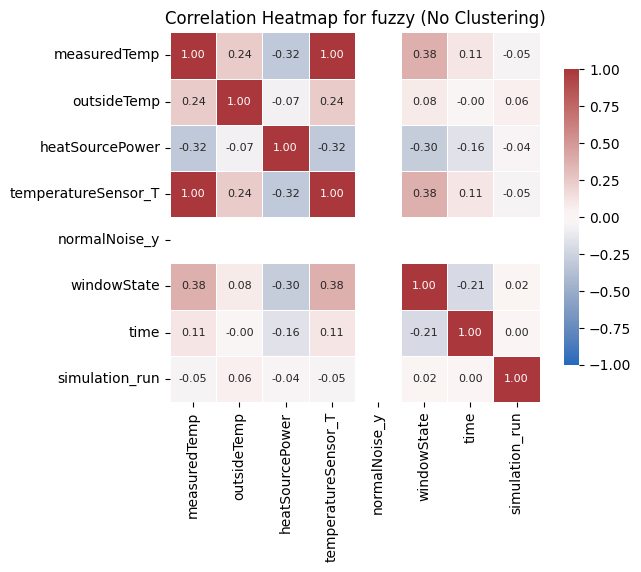

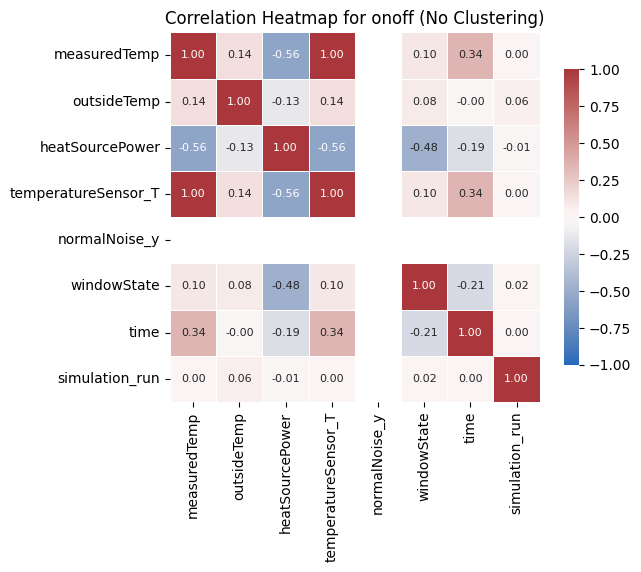

In [4]:
import numpy as np

# Detect non-finite values
print("NaNs:", pid_nominal.isnull().sum().sum())
print("Infs:", np.isinf(pid_nominal).sum().sum())


#sns.clustermap(pid_with_disturbances, cmap="vlag", annot=True,
#               row_cluster=False, col_cluster=False)
#plt.title("Correlation Heatmap (No Clustering)")
#plt.show()
# use global rule for transparency in cells

vmin, vmax = -1, 1

sns.heatmap(pid_with_disturbances.corr(), cmap="vlag", annot=True,
            vmin=vmin, vmax=vmax, 
            cbar_kws={"shrink": .8}, square=True, linewidths=.5,
            annot_kws={"size": 8}, fmt=".2f")
plt.title("Correlation Heatmap for pid (No Clustering)")
plt.savefig("plots/correlations/correlation_heatmap_pid.png")
plt.show()

sns.heatmap(fuzzy_with_disturbances.corr(), cmap="vlag", annot=True,
            vmin=vmin, vmax=vmax,
            cbar_kws={"shrink": .8}, square=True, linewidths=.5,
            annot_kws={"size": 8}, fmt=".2f")
plt.title("Correlation Heatmap for fuzzy (No Clustering)")
plt.savefig("plots/correlations/correlation_heatmap_fuzzy.png")
plt.show()


sns.heatmap(onoff_with_disturbances.corr(), cmap="vlag", annot=True,
            vmin=vmin, vmax=vmax,
            cbar_kws={"shrink": .8}, square=True, linewidths=.5,
            annot_kws={"size": 8}, fmt=".2f")
plt.title("Correlation Heatmap for onoff (No Clustering)")
plt.savefig("plots/correlations/correlation_heatmap_onoff.png")
plt.show()


Pearson correlation coefficient: -0.588462956392941
P-value: 0.0
Pearson correlation coefficient: -0.4803021598983733
P-value: 0.0
Pearson correlation coefficient: -0.29631589076862597
P-value: 0.0


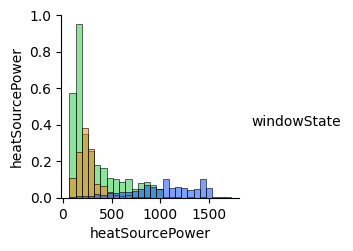

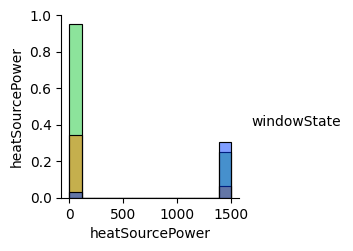

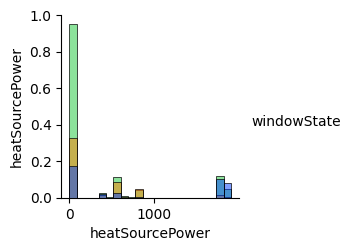

In [16]:
from scipy.stats import pearsonr

sns.pairplot(pid_with_disturbances[['heatSourcePower', 'windowState']].sample(2500), hue= 'windowState',
             palette='bright', diag_kind='hist', plot_kws={'s': 15})

plt.savefig("plots/correlations/window_vs_pid.png")

# Calculate Pearson correlation
r, p_value = pearsonr(pid_with_disturbances['heatSourcePower'], pid_with_disturbances['windowState'])

print(f"Pearson correlation coefficient: {r}")
print(f"P-value: {p_value}")

sns.pairplot(onoff_with_disturbances[['heatSourcePower', 'windowState']].sample(2500), hue='windowState',
             palette='bright', diag_kind='hist', plot_kws={'s': 15})

plt.savefig("plots/correlations/window_vs_onoff.png")

# Calculate Pearson correlation
r, p_value = pearsonr(onoff_with_disturbances['heatSourcePower'], onoff_with_disturbances['windowState'])

print(f"Pearson correlation coefficient: {r}")
print(f"P-value: {p_value}")

sns.pairplot(fuzzy_with_disturbances[['heatSourcePower', 'windowState']].sample(2500), hue='windowState',
             palette='bright', diag_kind='hist', plot_kws={'s': 15})

plt.savefig("plots/correlations/window_vs_fuzzy.png")


# Calculate Pearson correlation
r, p_value = pearsonr(fuzzy_with_disturbances['heatSourcePower'], fuzzy_with_disturbances['windowState'])

print(f"Pearson correlation coefficient: {r}")
print(f"P-value: {p_value}")


In [5]:
from scipy.stats import pearsonr



# Calculate Pearson correlation
r, p_value = pearsonr(pid_with_disturbances['heatSourcePower'], pid_with_disturbances['outsideTemp'])

print(f"Pearson correlation coefficient: {r} pid with disturbances")
print(f"P-value: {p_value}")

r, p_value = pearsonr(pid_nominal['heatSourcePower'], pid_nominal['outsideTemp'])

print(f"Pearson correlation coefficient: {r} pid nominal")
print(f"P-value: {p_value}")


r, p_value = pearsonr(onoff_with_disturbances['heatSourcePower'], onoff_with_disturbances['outsideTemp'])
print(f"Pearson correlation coefficient: {r} onoff with disturbances")
print(f"P-value: {p_value}")

# Calculate Pearson correlation
r, p_value = pearsonr(onoff_nominal['heatSourcePower'], onoff_nominal['outsideTemp'])
print(f"Pearson correlation coefficient: {r} onoff nominal")
print(f"P-value: {p_value}")

r, p_value = pearsonr(fuzzy_nominal['heatSourcePower'], fuzzy_nominal['outsideTemp'])
print(f"Pearson correlation coefficient: {r} fuzzy nominal")
print(f"P-value: {p_value}")

# Calculate Pearson correlation
r, p_value = pearsonr(fuzzy_with_disturbances['heatSourcePower'], fuzzy_with_disturbances['outsideTemp'])

print(f"Pearson correlation coefficient: {r} fuzzy with disturbances")
print(f"P-value: {p_value}")


Pearson correlation coefficient: -0.2178600176314579 pid with disturbances
P-value: 0.0
Pearson correlation coefficient: -0.09882846407853452 pid nominal
P-value: 0.0
Pearson correlation coefficient: -0.12717495987946145 onoff with disturbances
P-value: 0.0
Pearson correlation coefficient: -0.04163775881100319 onoff nominal
P-value: 0.0
Pearson correlation coefficient: -0.04313835640454154 fuzzy nominal
P-value: 0.0
Pearson correlation coefficient: -0.0734730279020418 fuzzy with disturbances
P-value: 0.0


                            OLS Regression Results                            
Dep. Variable:        heatSourcePower   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                 3.330e+05
Date:                Sun, 20 Jul 2025   Prob (F-statistic):               0.00
Time:                        23:38:50   Log-Likelihood:            -1.0211e+07
No. Observations:             1440100   AIC:                         2.042e+07
Df Residuals:                 1440096   BIC:                         2.042e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1

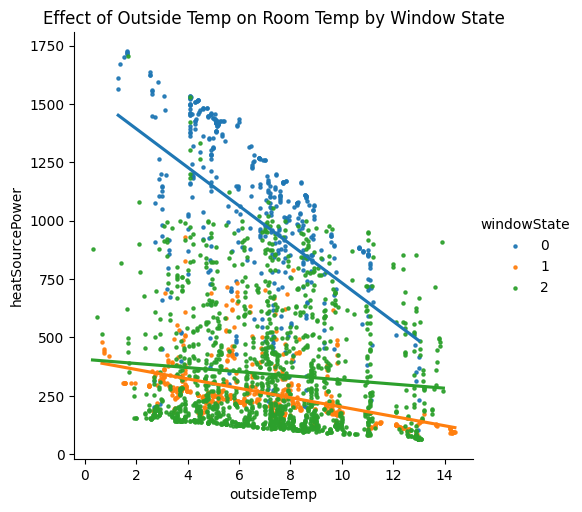

                            OLS Regression Results                            
Dep. Variable:        heatSourcePower   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                 1.550e+05
Date:                Sun, 20 Jul 2025   Prob (F-statistic):               0.00
Time:                        23:38:50   Log-Likelihood:            -1.1284e+07
No. Observations:             1440100   AIC:                         2.257e+07
Df Residuals:                 1440096   BIC:                         2.257e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1

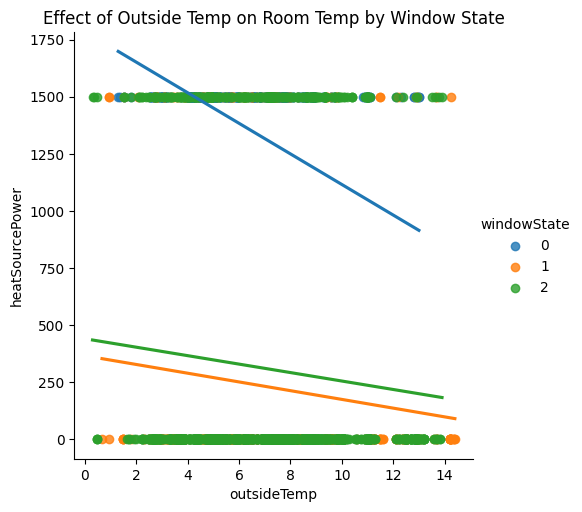

                            OLS Regression Results                            
Dep. Variable:        heatSourcePower   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                 4.783e+04
Date:                Sun, 20 Jul 2025   Prob (F-statistic):               0.00
Time:                        23:38:51   Log-Likelihood:            -1.1404e+07
No. Observations:             1440100   AIC:                         2.281e+07
Df Residuals:                 1440096   BIC:                         2.281e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

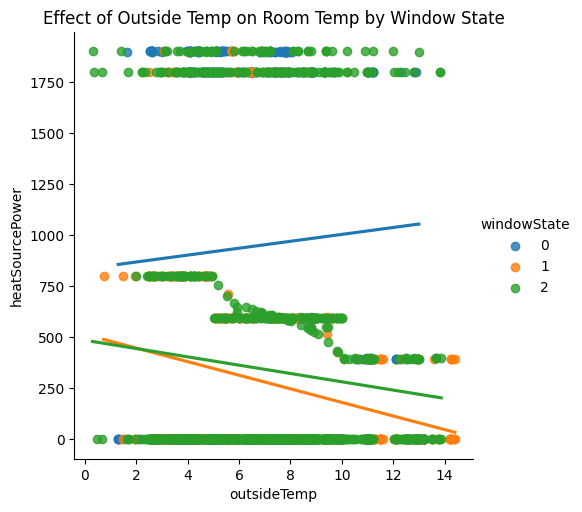

In [13]:

import statsmodels.formula.api as smf

model = smf.ols('heatSourcePower ~ outsideTemp + windowState + outsideTemp:windowState', data=pid_with_disturbances).fit()
print(model.summary())
sns.lmplot(
    data=pid_with_disturbances.sample(2500),
    x='outsideTemp',
    y='heatSourcePower',
    hue='windowState',  # Use different colors for each window state
    scatter_kws={'s': 5, 'alpha': 0.9},
    ci=None
)
plt.title("Effect of Outside Temp on Room Temp by Window State")
plt.savefig("plots/correlations/effect_outside_temp_heat_source_power_pid.png")
plt.show()


model = smf.ols('heatSourcePower ~ outsideTemp + windowState + outsideTemp:windowState', data=onoff_with_disturbances).fit()
print(model.summary())
sns.lmplot(
    data=onoff_with_disturbances.sample(2500),
    x='outsideTemp',
    y='heatSourcePower',
    hue='windowState',  # Use different colors for each window state
    ci=None
)
plt.title("Effect of Outside Temp on Room Temp by Window State")
plt.show()

model = smf.ols('heatSourcePower ~ outsideTemp + windowState + outsideTemp:windowState', data=fuzzy_with_disturbances).fit()
print(model.summary())
sns.lmplot(
    data=fuzzy_with_disturbances.sample(2500),
    x='outsideTemp',
    y='heatSourcePower',
    hue='windowState',  # Use different colors for each window state
    ci=None
)
plt.title("Effect of Outside Temp on Room Temp by Window State")
plt.show()